# Step 1:- Import Libraries, Read File, Understand Data 
(Continuously incorporate new libraries as needed to address specific requirements.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import warnings
from scipy.stats import shapiro, anderson
from sklearn.model_selection import train_test_split,GridSearchCV
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score, make_scorer

warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('fivethirtyeight')
pd.options.display.float_format = '{:.2f}'.format

In [2]:
kaggle_house_price_df=pd.read_csv('../data/house-prices-advanced-regression-techniques/train.csv')
kaggle_house_price_df.shape

(1460, 81)

# Step 2:- EDA

In [3]:
kaggle_house_price_df.iloc[:5,:20]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000


In [4]:
kaggle_house_price_df.info()
kaggle_house_price_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.00,1460.00,1460,1201.00,1460.00,1460,91,1460,1460,1460,...,1460.00,7,281,54,1460.00,1460.00,1460.00,1460,1460,1460.00
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.50,56.90,NaN,70.05,10516.83,NaN,NaN,NaN,NaN,NaN,...,2.76,NaN,NaN,NaN,43.49,6.32,2007.82,NaN,NaN,180921.20
std,421.61,42.30,NaN,24.28,9981.26,NaN,NaN,NaN,NaN,NaN,...,40.18,NaN,NaN,NaN,496.12,2.70,1.33,NaN,NaN,79442.50
min,1.00,20.00,NaN,21.00,1300.00,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,0.00,1.00,2006.00,NaN,NaN,34900.00
25%,365.75,20.00,NaN,59.00,7553.50,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,0.00,5.00,2007.00,NaN,NaN,129975.00
50%,730.50,50.00,NaN,69.00,9478.50,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,0.00,6.00,2008.00,NaN,NaN,163000.00
75%,1095.25,70.00,NaN,80.00,11601.50,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,0.00,8.00,2009.00,NaN,NaN,214000.00


In [5]:
#Identify numerical features
numerical_columns= list(set(kaggle_house_price_df.select_dtypes(exclude='object').columns.tolist())-{'Id','SalePrice'})

In [6]:
for column in numerical_columns:
    stat, p = shapiro(kaggle_house_price_df[column])
    print(f'Shapiro-Wilk Test for {column}: Statistic={stat}, p-value={p}')

    result = anderson(kaggle_house_price_df[column])
    print(f'Anderson-Darling Test for {column}: Statistic={result.statistic}, Critical Values={result.critical_values}')
    print('*****************************************************')

Shapiro-Wilk Test for OpenPorchSF: Statistic=0.7271679639816284, p-value=1.1350517561031018e-43
Anderson-Darling Test for OpenPorchSF: Statistic=115.91895898622147, Critical Values=[0.574 0.654 0.785 0.916 1.089]
*****************************************************
Shapiro-Wilk Test for LotFrontage: Statistic=nan, p-value=1.0
Anderson-Darling Test for LotFrontage: Statistic=nan, Critical Values=[0.574 0.654 0.785 0.916 1.089]
*****************************************************
Shapiro-Wilk Test for YrSold: Statistic=0.897101640701294, p-value=3.424128527561103e-30
Anderson-Darling Test for YrSold: Statistic=50.838257800872725, Critical Values=[0.574 0.654 0.785 0.916 1.089]
*****************************************************
Shapiro-Wilk Test for 1stFlrSF: Statistic=0.9269488453865051, p-value=4.517477609440629e-26
Anderson-Darling Test for 1stFlrSF: Statistic=19.16505295807542, Critical Values=[0.574 0.654 0.785 0.916 1.089]
*****************************************************
S

<h3><span style="color: brown;"> Check Null Entries </span> </h3>

In [7]:
kaggle_house_price_df_count = pd.DataFrame({
    'Column Name': kaggle_house_price_df.columns,
    'Data Type': kaggle_house_price_df.dtypes.values,
    'Null Count': kaggle_house_price_df.isnull().sum().values
})

kaggle_house_price_df_count[kaggle_house_price_df_count['Null Count'] > 0].sort_values(by=['Data Type','Null Count'])

,Column Name,Data Type,Null Count
26,MasVnrArea,float64,8
59,GarageYrBlt,float64,81
3,LotFrontage,float64,259
42,Electrical,object,1
25,MasVnrType,object,8
30,BsmtQual,object,37
31,BsmtCond,object,37
33,BsmtFinType1,object,37
32,BsmtExposure,object,38
35,BsmtFinType2,object,38


<h3><span style="color: brown;"> Check Categorical Columns For Encoding </span></h3> Decide what kind of encoding technique should be applied

In [8]:
#kaggle_house_price_df.columns if df[column].dtype == 'object'

#may be later this code will be required
kaggle_house_price_unique_count = pd.DataFrame({
    'Column Name': kaggle_house_price_df.columns,
    'Data Type': kaggle_house_price_df.dtypes.values,
    'Unique Count': kaggle_house_price_df.nunique().values
})

#print(kaggle_house_price_unique_count[(kaggle_house_price_unique_count['Unique Count'] > 0 )& (kaggle_house_price_unique_count['Data Type']=='object')])
print(kaggle_house_price_unique_count[kaggle_house_price_unique_count['Data Type']=='object'])

# Step 3:- Visualize Data
To gain a comprehensive understanding of the data and determine the most suitable modeling approach:
<br>
<b>Visualize Data:</b> Employ graphical representations, such as histograms, scatter plots, and box plots, to visualize the distribution, patterns, and relationships within the data.
<br>
<b>Analyze Data Distribution:</b> Assess the distribution of each feature using descriptive statistics and visualizations to identify outliers, skewness, and potential data irregularities.

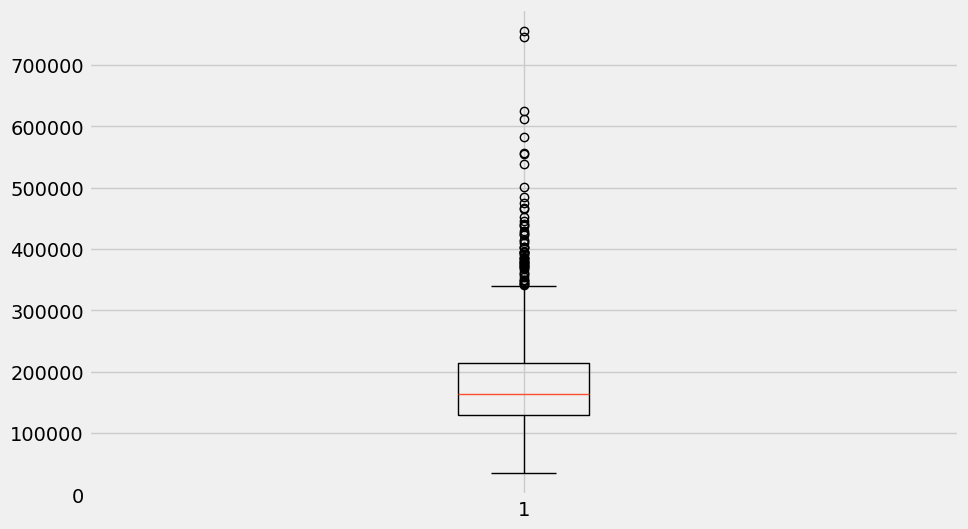

In [9]:
plt.figure(figsize=(10,6))
plt.boxplot(kaggle_house_price_df['SalePrice'])
plt.show()

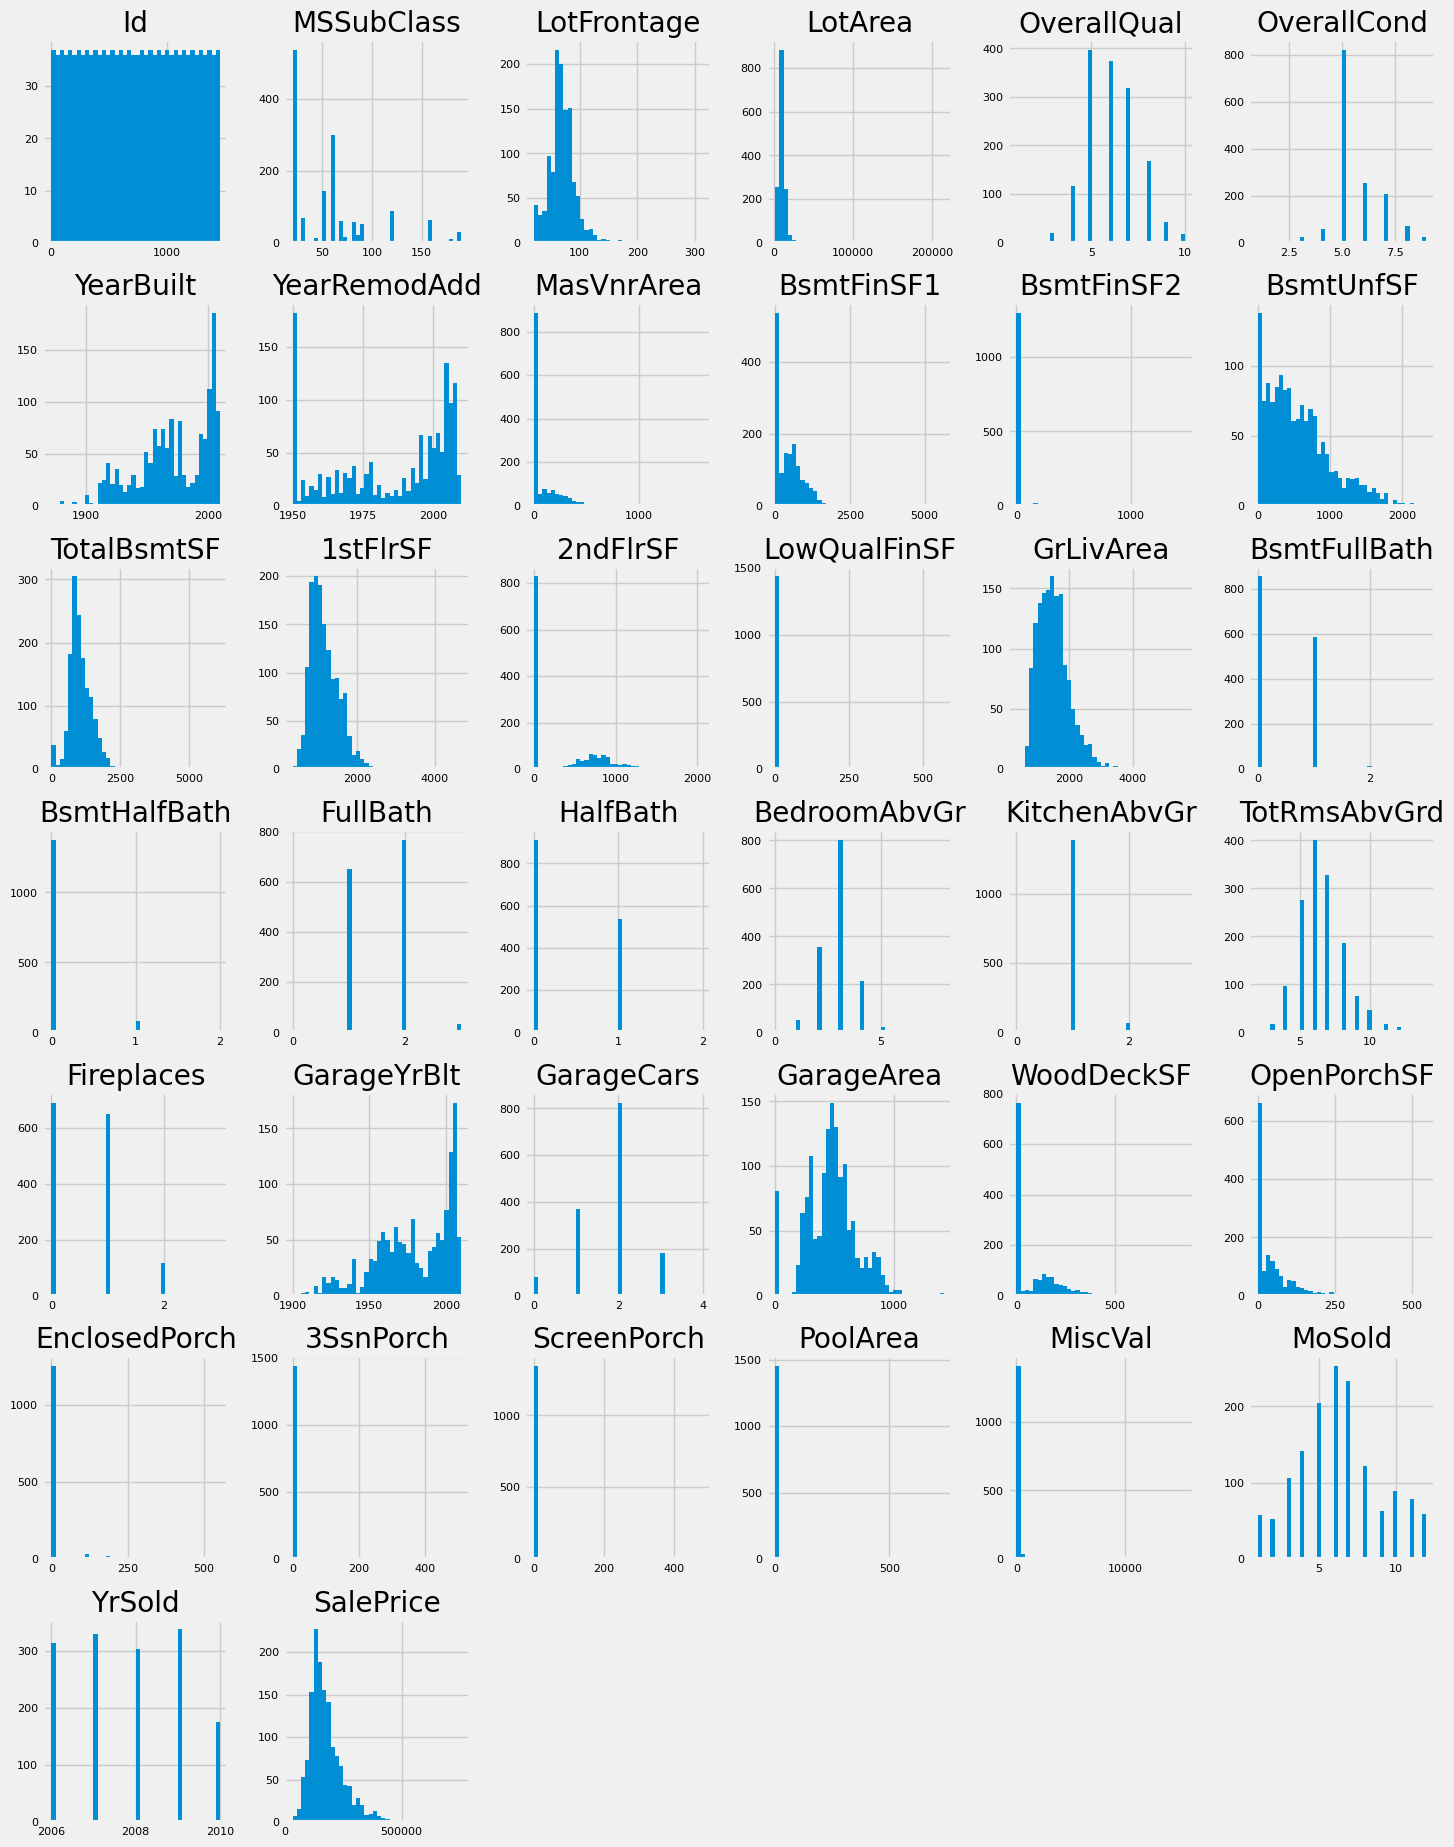

In [10]:
kaggle_house_price_df.hist(figsize=(16,22),bins=40,xlabelsize=8, ylabelsize=8);

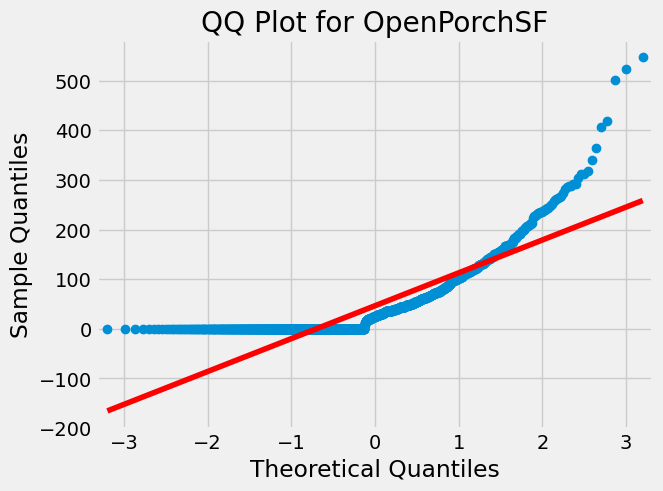

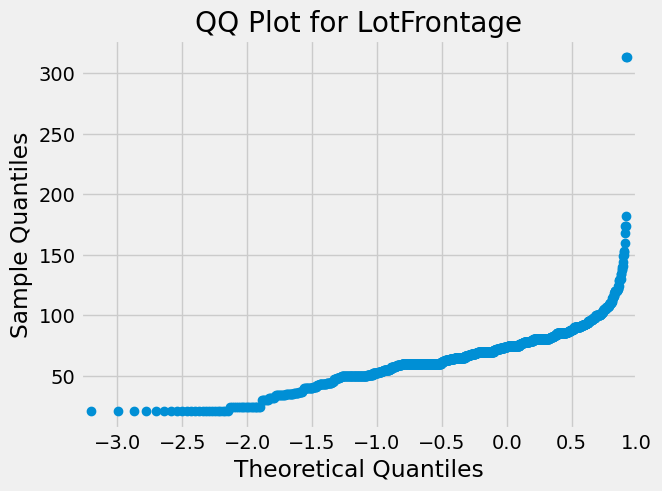

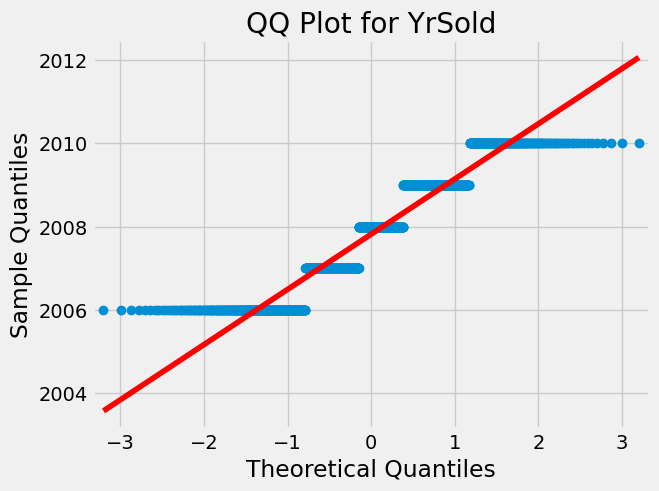

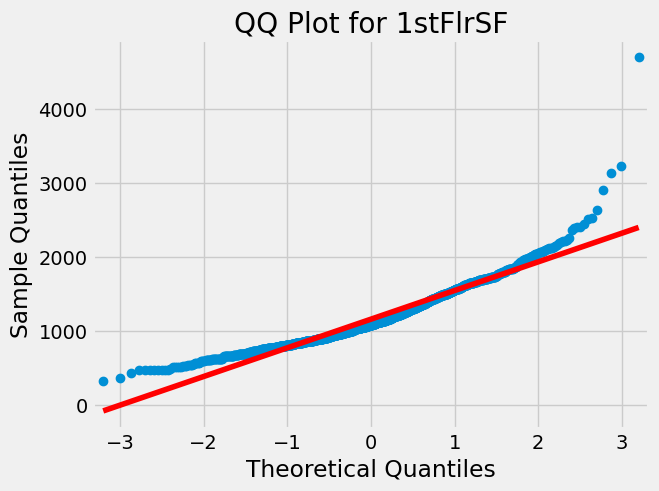

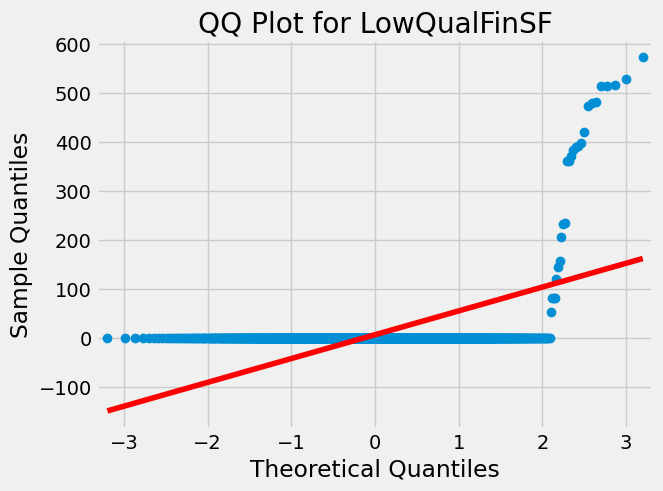

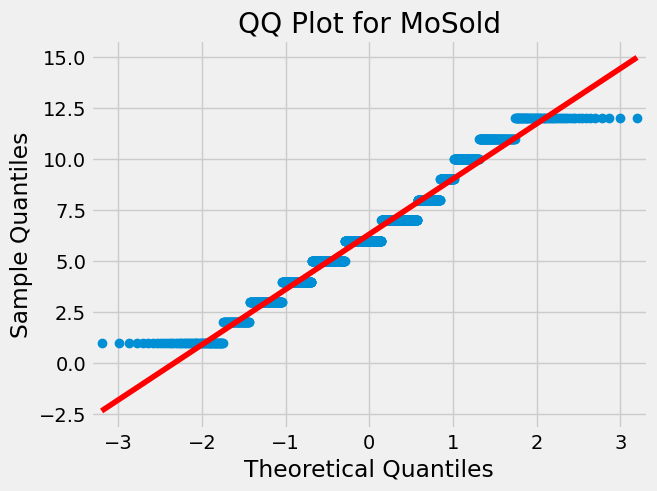

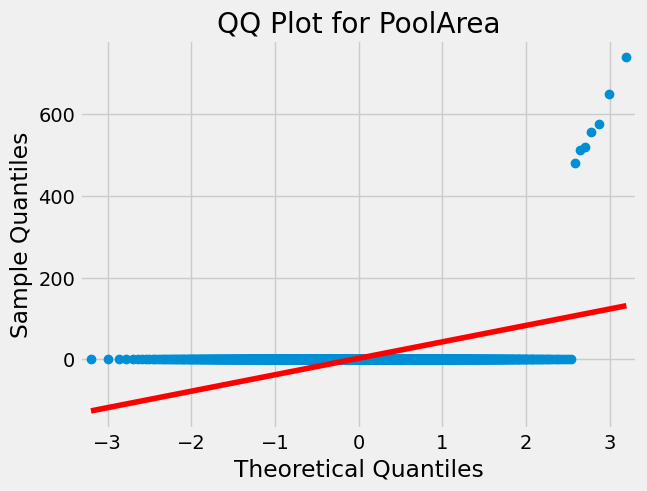

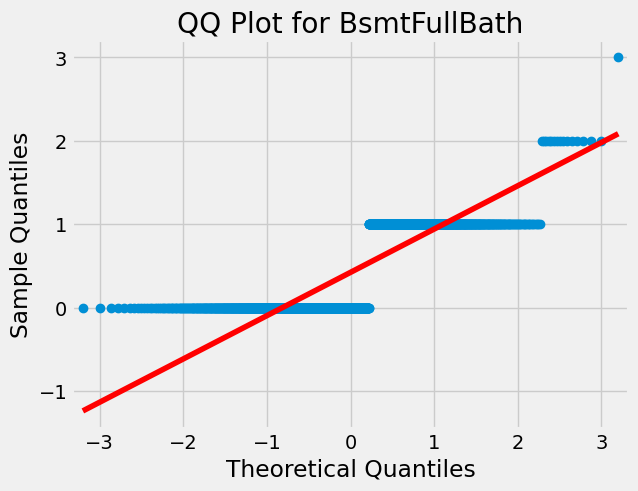

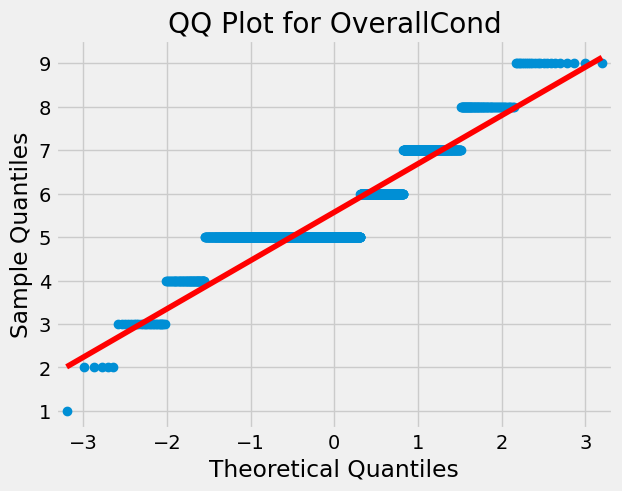

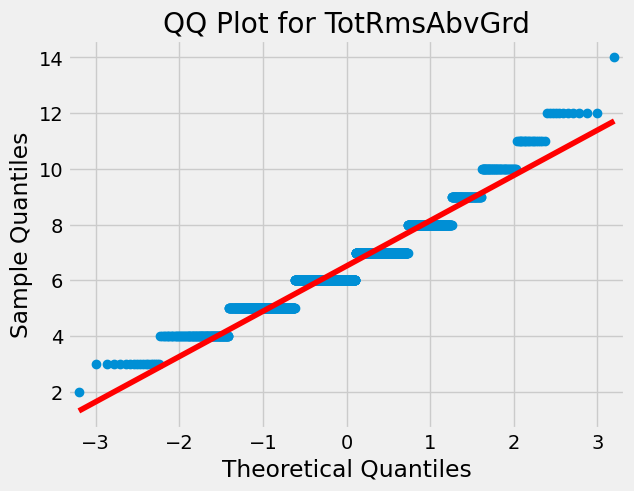

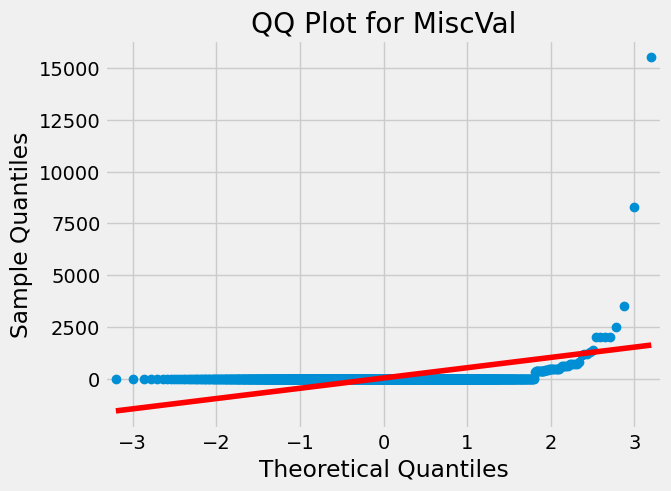

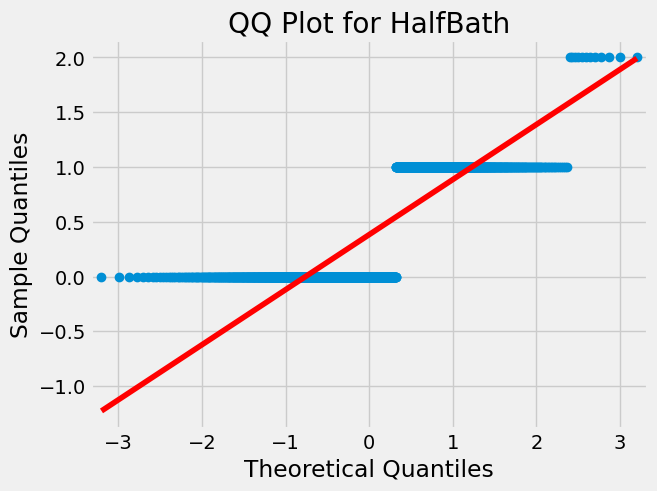

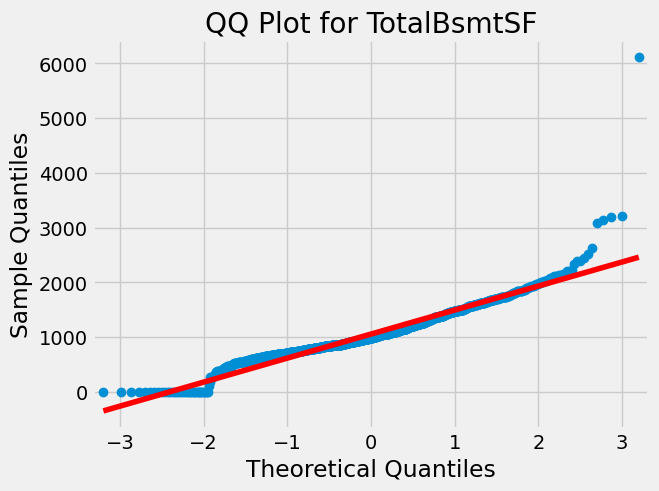

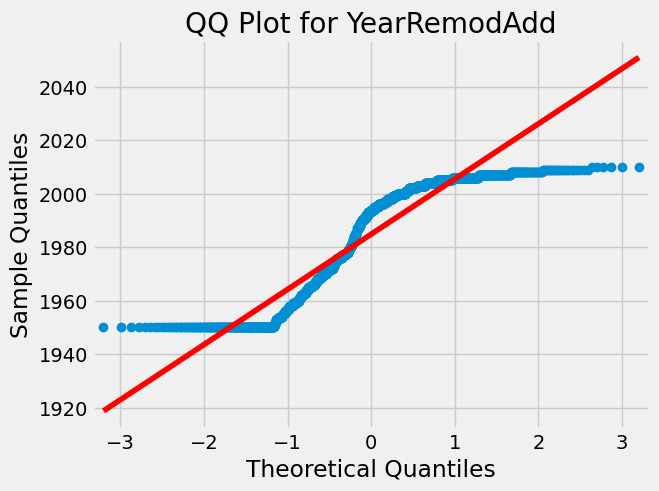

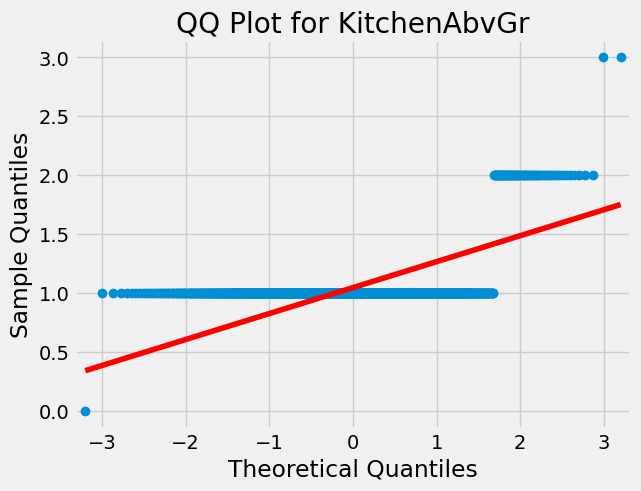

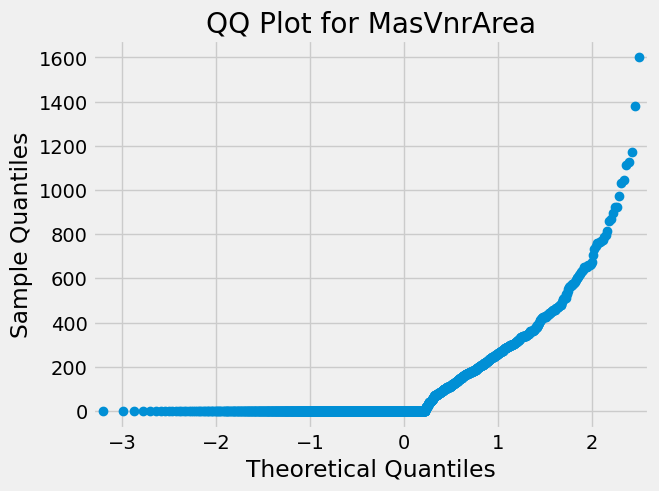

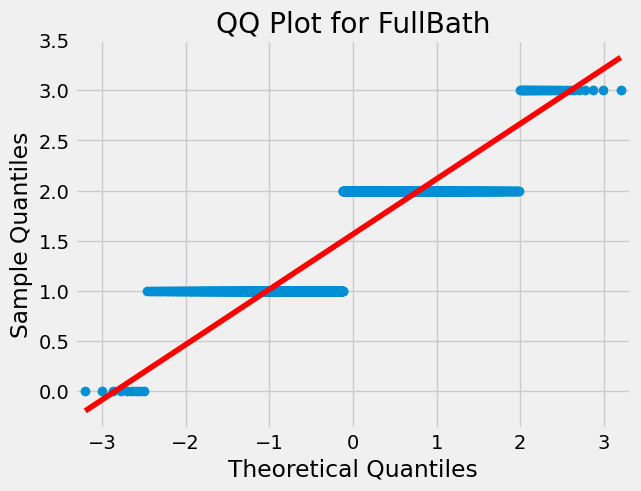

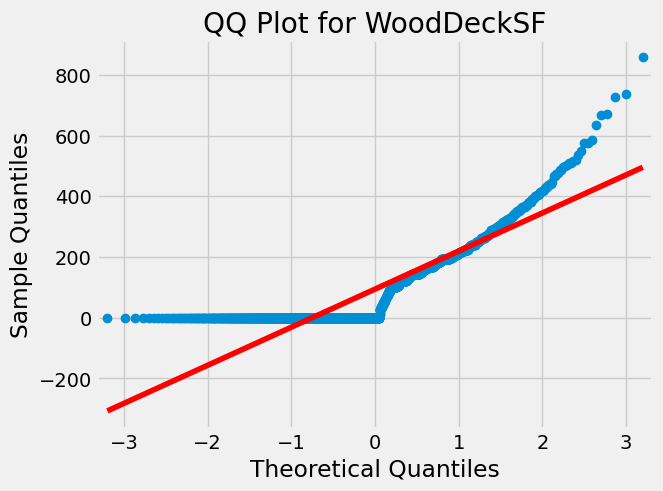

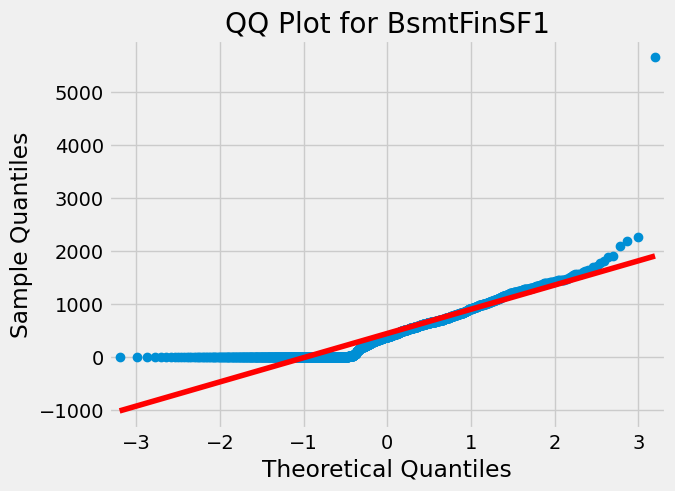

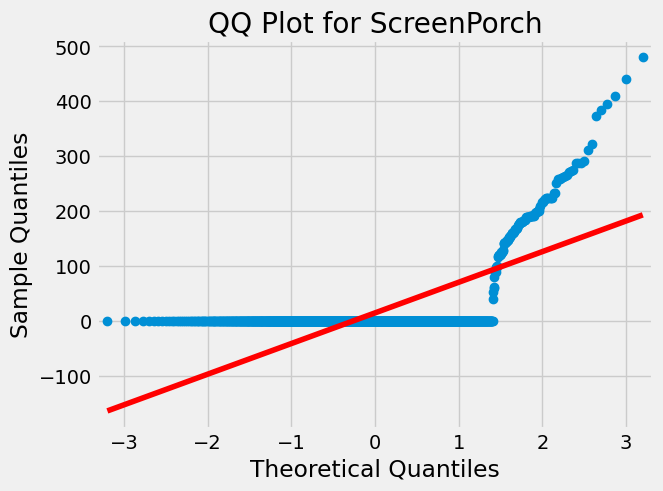

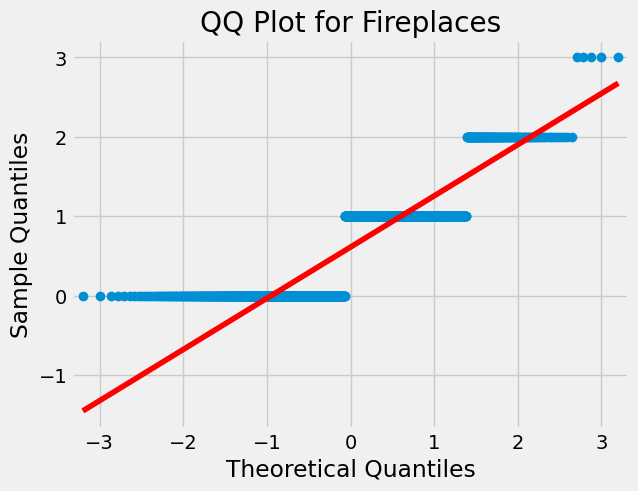

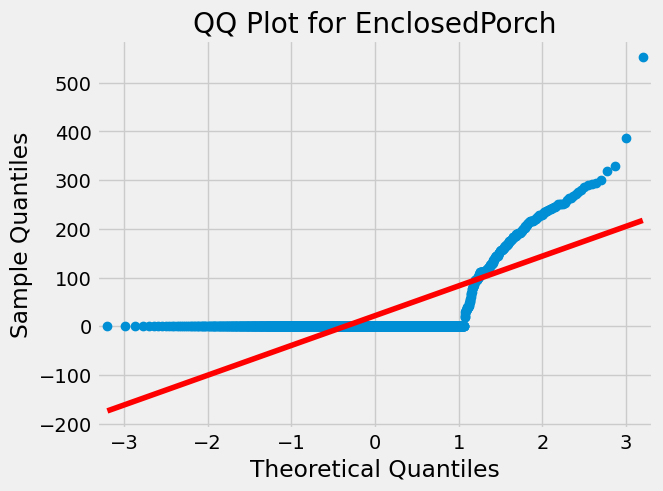

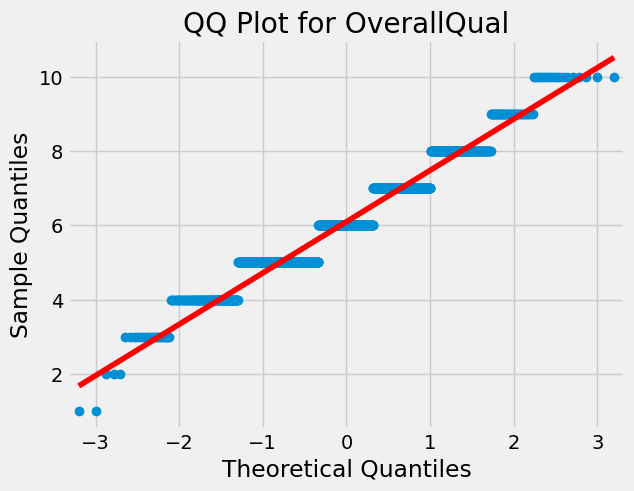

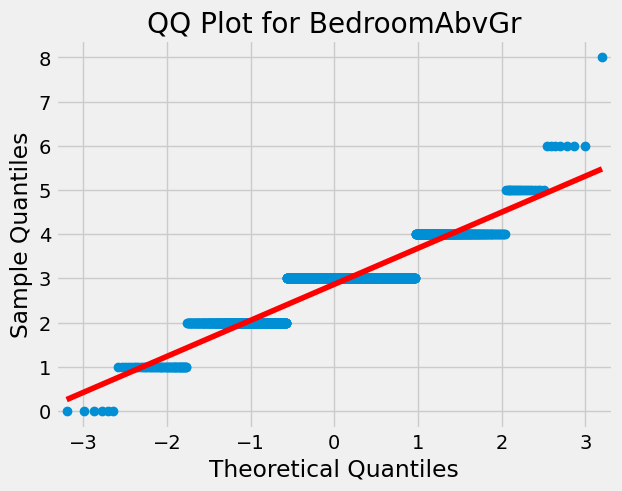

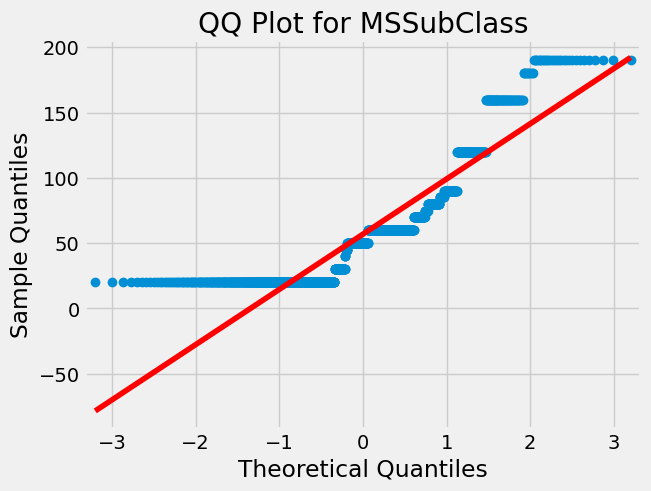

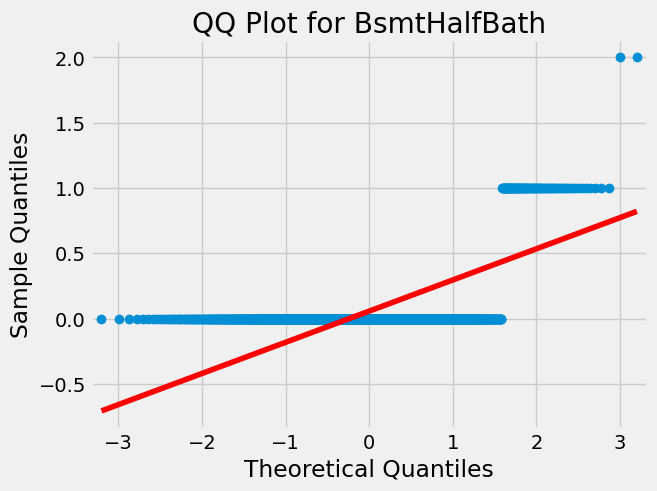

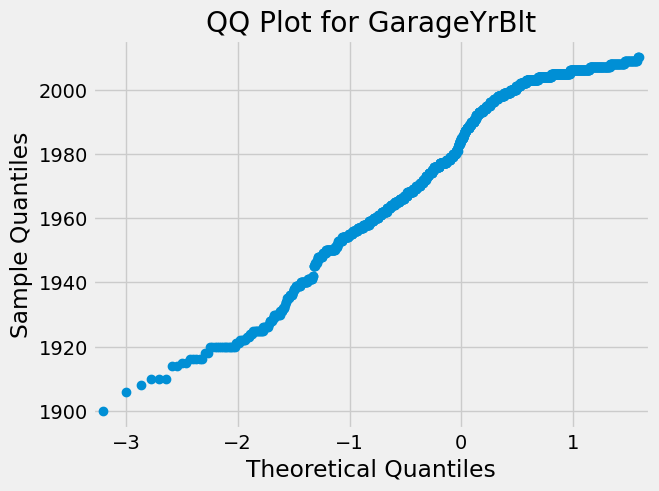

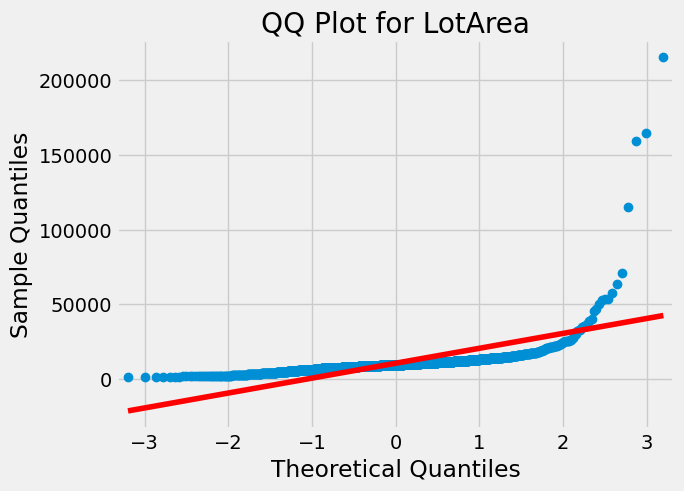

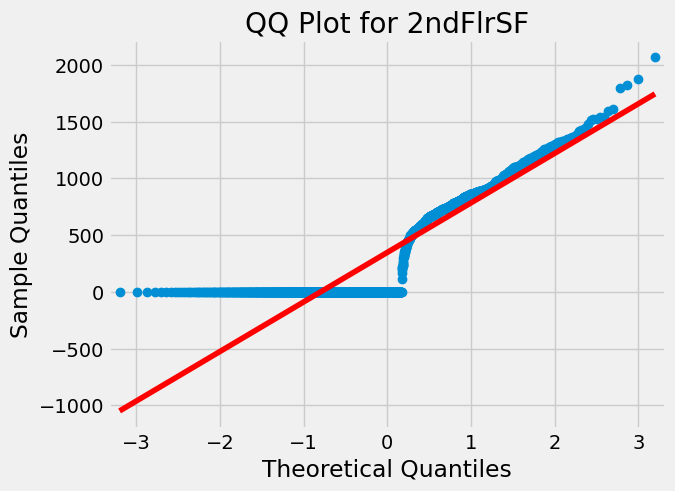

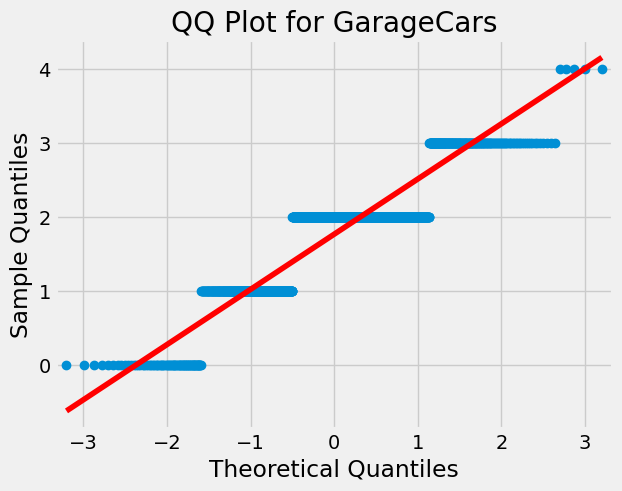

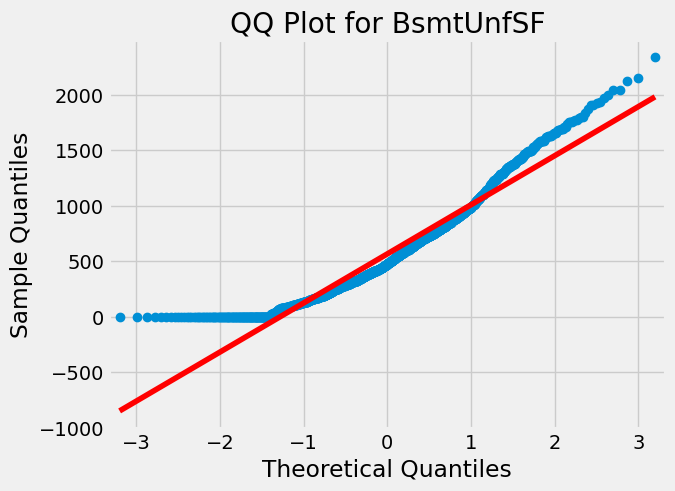

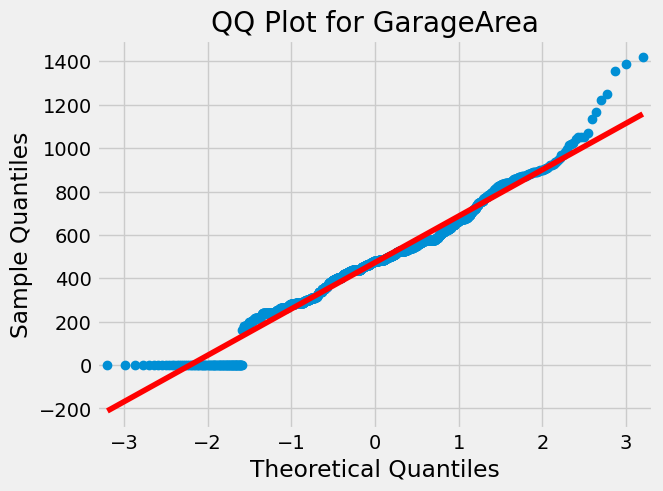

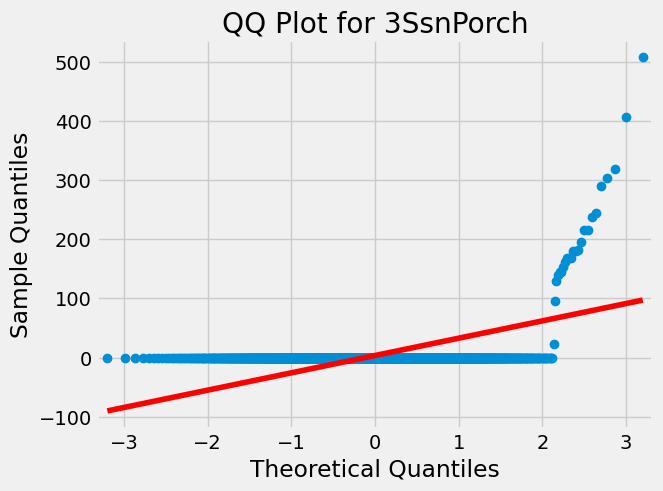

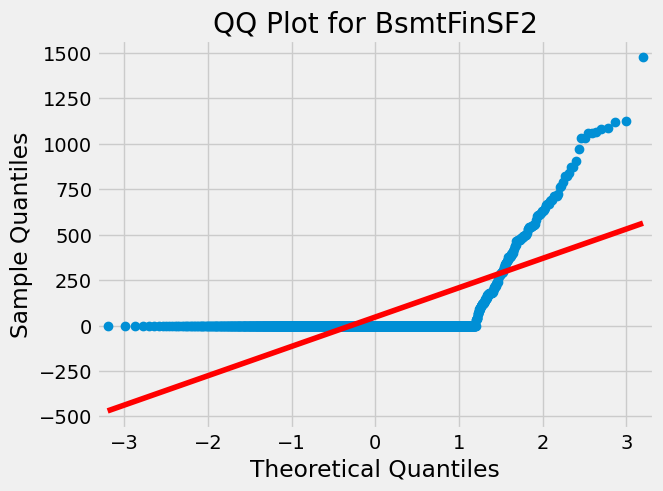

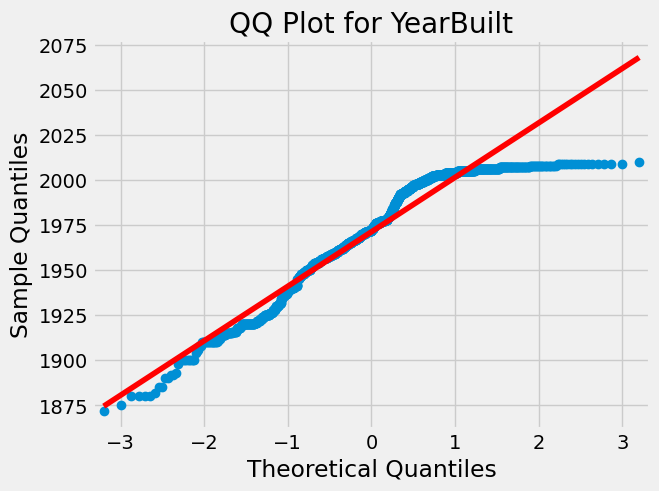

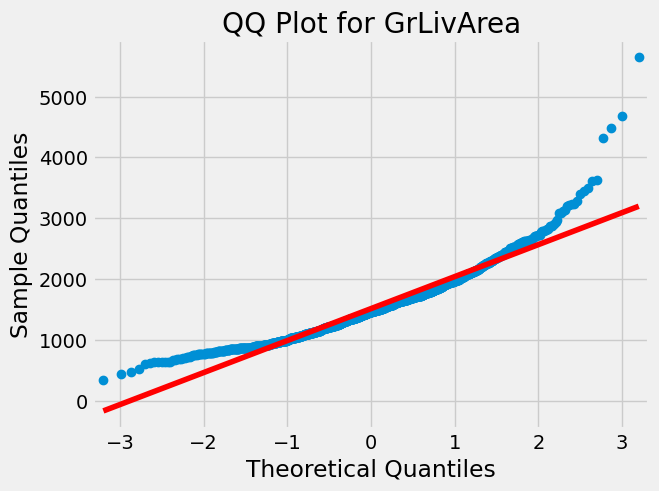

In [11]:
for column in numerical_columns:
    sm.qqplot(kaggle_house_price_df[column], line='s')
    plt.title(f'QQ Plot for {column}')
    plt.show()

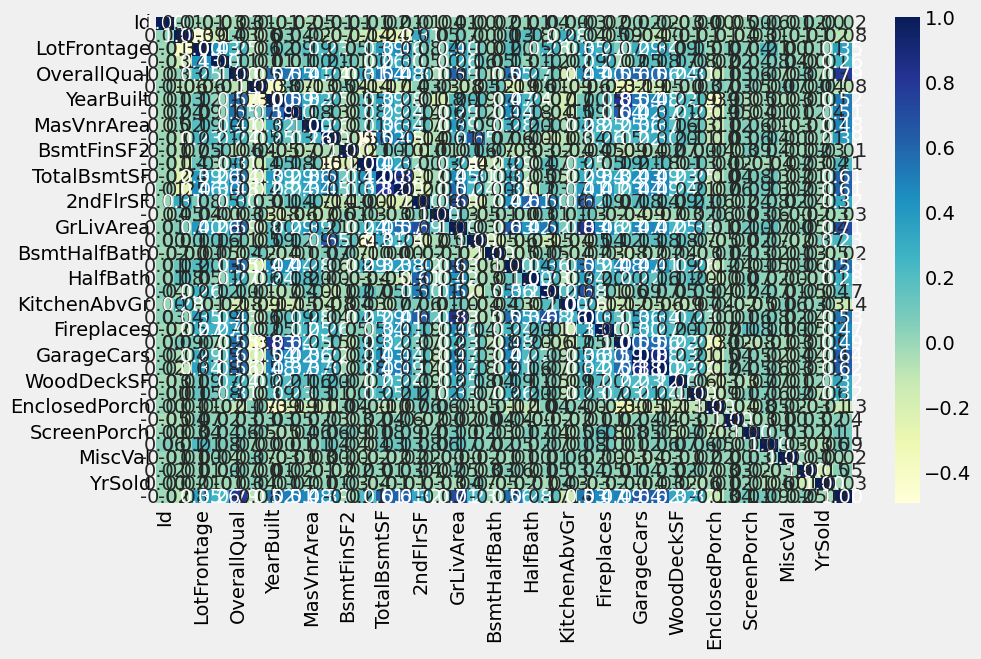

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(kaggle_house_price_df.corr(),cmap='YlGnBu',annot=True,fmt='.2f')
plt.show()

In [13]:
kaggle_house_price_df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.00,0.01,-0.01,-0.03,-0.03,0.01,-0.01,-0.02,-0.05,-0.01,...,-0.03,-0.00,0.00,-0.05,0.00,0.06,-0.01,0.02,0.00,-0.02
MSSubClass,0.01,1.00,-0.39,-0.14,0.03,-0.06,0.03,0.04,0.02,-0.07,...,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.08
LotFrontage,-0.01,-0.39,1.00,0.43,0.25,-0.06,0.12,0.09,0.19,0.23,...,0.09,0.15,0.01,0.07,0.04,0.21,0.00,0.01,0.01,0.35
LotArea,-0.03,-0.14,0.43,1.00,0.11,-0.01,0.01,0.01,0.10,0.21,...,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26
OverallQual,-0.03,0.03,0.25,0.11,1.00,-0.09,0.57,0.55,0.41,0.24,...,0.24,0.31,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.03,0.79
OverallCond,0.01,-0.06,-0.06,-0.01,-0.09,1.00,-0.38,0.07,-0.13,-0.05,...,-0.00,-0.03,0.07,0.03,0.05,-0.00,0.07,-0.00,0.04,-0.08
YearBuilt,-0.01,0.03,0.12,0.01,0.57,-0.38,1.00,0.59,0.32,0.25,...,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01,0.52
YearRemodAdd,-0.02,0.04,0.09,0.01,0.55,0.07,0.59,1.00,0.18,0.13,...,0.21,0.23,-0.19,0.05,-0.04,0.01,-0.01,0.02,0.04,0.51
MasVnrArea,-0.05,0.02,0.19,0.10,0.41,-0.13,0.32,0.18,1.00,0.26,...,0.16,0.13,-0.11,0.02,0.06,0.01,-0.03,-0.01,-0.01,0.48
BsmtFinSF1,-0.01,-0.07,0.23,0.21,0.24,-0.05,0.25,0.13,0.26,1.00,...,0.20,0.11,-0.10,0.03,0.06,0.14,0.00,-0.02,0.01,0.39


# Step 4:- Preprocessing Data

In [14]:
kaggle_house_price_df.drop("Id", axis=1, inplace=True) #this column is not required

<h3><span style="color: brown;"> Handle Missing Values </span> </h3>

In data_description.txt file we can see (except Electrical) for all other columns null value is possible.
1. We will replace null value in Electrical column with most common value
2. For float type we will replace with null values with 0.00
3. For object type columns (except Electrical) we will replace the null values with 'N/A'

In [15]:
kaggle_house_price_df['Electrical'].fillna(kaggle_house_price_df['Electrical'].mode().iloc[0],inplace=True)

In [16]:
float_column_names=['MasVnrArea','GarageYrBlt','LotFrontage']
for column_name in float_column_names:
  kaggle_house_price_df[column_name].fillna(0.0, inplace=True)

In [17]:
null_df=kaggle_house_price_df.isnull().sum()
for column, count in null_df.iteritems():
    if(count>0):
        kaggle_house_price_df[column].fillna('N/A', inplace=True)

<h3><span style="color: brown;"> Handle Duplicate Data </span> </h3>

In [18]:
kaggle_house_price_df.drop_duplicates(inplace=True)

<h3><span style="color: brown;"> Handle Categorical Data </span> </h3>

Before handling Categorical Data lets try <b>catboost</b> and check its performance, as catboost does not require special handling for categorical data.

# Step 5:- Find Correct Model

In [19]:
X=kaggle_house_price_df.drop('SalePrice',axis=1)
y=kaggle_house_price_df['SalePrice']

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=42)

categorical_features = [kaggle_house_price_df.columns.get_loc(col) for col in 
                        kaggle_house_price_df.columns if kaggle_house_price_df[col].dtype == 'object']
# Create CatBoostRegressor
catboost_model = CatBoostRegressor(cat_features=categorical_features, random_seed=42, verbose=0)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [6, 8, 10]
}

# Define R^2 as the scoring metric for GridSearchCV
#r2_scorer = make_scorer(r2_score)

# Define RMSE as the scoring metric for GridSearchCV
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))

# Initialize GridSearchCV
grid_search = GridSearchCV(catboost_model, param_grid, scoring=rmse_scorer, cv=5)

# Initialize GridSearchCV
#grid_search = GridSearchCV(catboost_model, param_grid, scoring=r2_scorer, cv=5)

# Fit the model
grid_search.fit(X_train, y_train, eval_set=(X_val, y_val))

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Make predictions using the best model
y_pred = grid_search.best_estimator_.predict(X_val)

# Evaluate the model
r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f'R^2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Best Parameters: {'depth': 10, 'iterations': 500, 'learning_rate': 0.01}
R^2 Score: 0.8807612956095866
Root Mean Squared Error: 28812.727909772944


In [20]:
model = CatBoostRegressor(cat_features=categorical_features, **best_params, random_seed=42, verbose=0,  task_type='CPU')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_val)

# Evaluate the model performance
r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f'R^2 Score: {r2}')
print(f'Mean Squared Error: {rmse}')

R^2 Score: 0.8807612956095866
Mean Squared Error: 28812.727909772944


# Try it on test data

In [21]:
kaggle_test_house_price_df=pd.read_csv('../data/house-prices-advanced-regression-techniques/test.csv')
kaggle_test_house_price_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [22]:
kaggle_test_house_price_df.shape

(1459, 80)

In [23]:
kaggle_null_count = pd.DataFrame({
    'Column Name': kaggle_test_house_price_df.columns,
    'Data Type': kaggle_test_house_price_df.dtypes.values,
    'Null Count': kaggle_test_house_price_df.isnull().sum().values
})

kaggle_null_count[kaggle_null_count['Null Count'] > 0].sort_values(by=['Data Type','Null Count'])

,Column Name,Data Type,Null Count
34,BsmtFinSF1,float64,1
36,BsmtFinSF2,float64,1
37,BsmtUnfSF,float64,1
38,TotalBsmtSF,float64,1
61,GarageCars,float64,1
62,GarageArea,float64,1
47,BsmtFullBath,float64,2
48,BsmtHalfBath,float64,2
26,MasVnrArea,float64,15
59,GarageYrBlt,float64,78


<h3> CatBoost does not accept NaN values so lets fix it

In [24]:
# Impute missing values separately for numerical and categorical features
categorical_columns = [col for col in kaggle_test_house_price_df.columns if 
                       kaggle_test_house_price_df[col].dtype == 'object']

#for some reason this code is not working, will check later, try some other way
kaggle_test_house_price_df[numerical_columns].fillna(kaggle_test_house_price_df[numerical_columns].mean(),inplace=True)
kaggle_test_house_price_df[categorical_columns].fillna(kaggle_test_house_price_df[categorical_columns].mode().iloc[0],inplace=True)

In [25]:
# Replace missing values in categorical columns with the most frequent value
for col in categorical_columns:
    mode_val = kaggle_test_house_price_df[col].mode().iloc[0]
    kaggle_test_house_price_df[col].fillna(mode_val, inplace=True)
    
# Replace missing values in numerical columns with the mean
for col in numerical_columns:
    mean_val = kaggle_test_house_price_df[col].mean()
    kaggle_test_house_price_df[col].fillna(mean_val, inplace=True)

In [26]:
X_ids=kaggle_test_house_price_df['Id']
X_test=kaggle_test_house_price_df.drop('Id',axis=1)
predictions = model.predict(X_test)

submission_df = pd.DataFrame({'Id': X_ids, 'SalePrice': predictions})
submission_df.head(5)

,Id,SalePrice
0,1461,129942.81
1,1462,163010.11
2,1463,183381.81
3,1464,184657.54
4,1465,203426.88


# Submit Final Output

In [27]:
submission = pd.read_csv('../data/house-prices-advanced-regression-techniques/sample_submission.csv')
submission['SalePrice'] = predictions
submission.to_csv('../data/house-prices-advanced-regression-techniques/submission.csv', index=False)
submission.head(5)

,Id,SalePrice
0,1461,129942.81
1,1462,163010.11
2,1463,183381.81
3,1464,184657.54
4,1465,203426.88


Next Model to Try <h1> LightGBM</h1>



# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LightGBM regressor
lgb_model = lgb.LGBMRegressor()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [6, 8, 10]
}

# Define RMSE as the scoring metric for GridSearchCV
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Initialize GridSearchCV
grid_search = GridSearchCV(lgb_model, param_grid, scoring=rmse_scorer, cv=5)

# Fit the model
grid_search.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=20, verbose=False)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Make predictions using the best model
y_pred = grid_search.best_estimator_.predict(X_val)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE: {rmse}')